#### Objective - 
Model with 3 Different MLP architecture on MNIST data set.
1. 2- Hidden Layer Architecture(784-450-190-10)
2. 3-Hidden Layer Architecture(784-250-190-100-10)
3. 5-Hidden Layer Architecture(784-215-170-135-80-25-10)

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:

# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [0]:

# after converting the input images from 3d to 2d vectors

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

In [0]:
# An example data point
print(X_train[0])

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:

# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 2-Hidden layer architecture (784-450-190-10 architecture)¶
### Using MLP+Adam+ReLU

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(450, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(190, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 450)               353250    
_________________________________________________________________
dense_106 (Dense)            (None, 190)               85690     
_________________________________________________________________
dense_107 (Dense)            (None, 10)                1910      
Total params: 440,850
Trainable params: 440,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history11 = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.9218 - acc: 0.7286 - val_loss: 0.4340 - val_acc: 0.8705
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3778 - acc: 0.8894 - val_loss: 0.3312 - val_acc: 0.9028
Epoch 3/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3192 - acc: 0.9070 - val_loss: 0.2995 - val_acc: 0.9106
Epoch 4/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2847 - acc: 0.9176 - val_loss: 0.2691 - val_acc: 0.9178
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2564 - acc: 0.9250 - val_loss: 0.2427 - val_acc: 0.9279
Epoch 6/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2286 - acc: 0.9331 - val_loss: 0.2209 - val_acc: 0.9329
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2067 - acc: 0.9397 - val_loss: 0.1945 -

Test score: 0.0951651296434924
Test accuracy: 0.9708


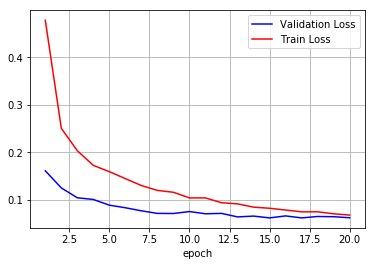

In [0]:
%matplotlib inline
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax11 = plt.subplots(1,1)
ax11.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy11 = history.history['val_loss']
ty11 = history.history['loss']
plt_dynamic(x, vy11, ty11, ax11)


# MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(450, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(190, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 450)               353250    
_________________________________________________________________
batch_normalization_47 (Batc (None, 450)               1800      
_________________________________________________________________
dense_109 (Dense)            (None, 190)               85690     
_________________________________________________________________
batch_normalization_48 (Batc (None, 190)               760       
_________________________________________________________________
dense_110 (Dense)            (None, 10)                1910      
Total params: 443,410
Trainable params: 442,130
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history12 = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.2242 - acc: 0.9347 - val_loss: 0.1561 - val_acc: 0.9522
Epoch 2/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.1026 - acc: 0.9699 - val_loss: 0.1801 - val_acc: 0.9427
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0711 - acc: 0.9787 - val_loss: 0.1056 - val_acc: 0.9684
Epoch 4/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0528 - acc: 0.9839 - val_loss: 0.1341 - val_acc: 0.9567
Epoch 5/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0461 - acc: 0.9862 - val_loss: 0.1320 - val_acc: 0.9599
Epoch 6/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.0381 - acc: 0.9890 - val_loss: 0.0870 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0285 - acc: 0.9917 - val_loss: 0.

Test score: 0.11341167752964976
Test accuracy: 0.9744


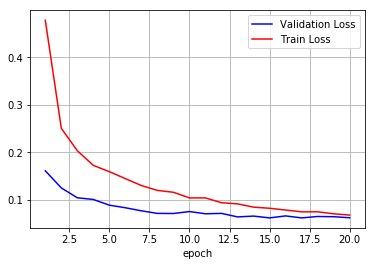

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score3=score[0]
score4=score[1]
train_acc2=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax12 = plt.subplots(1,1)
ax12.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy12 = history.history['val_loss']
ty12 = history.history['loss']
plt_dynamic(x, vy12, ty12, ax12)


# MLP + Dropout + AdamOptimizer 

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_49 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 128)               65664     
_________________________________________________________________
batch_normalization_50 (Batc (None, 128)               512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history13 = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.5645 - acc: 0.8257 - val_loss: 0.2349 - val_acc: 0.9285
Epoch 2/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.3656 - acc: 0.8893 - val_loss: 0.2027 - val_acc: 0.9400
Epoch 3/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.3217 - acc: 0.9028 - val_loss: 0.1811 - val_acc: 0.9449
Epoch 4/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.3003 - acc: 0.9094 - val_loss: 0.1764 - val_acc: 0.9435
Epoch 5/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.2810 - acc: 0.9154 - val_loss: 0.1536 - val_acc: 0.9513
Epoch 6/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.2691 - acc: 0.9181 - val_loss: 0.1475 - val_acc: 0.9556
Epoch 7/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.2584 - acc: 0.9223 - val_loss: 0.

Test score: 0.10941378992907703
Test accuracy: 0.9652


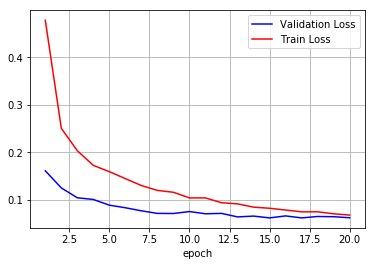

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy13 = history.history['val_loss']
ty13 = history.history['loss']
plt_dynamic(x, vy13, ty13, ax13)


# 3-Hidden layer architecture (784-450-190-100-10 architecture)¶
#### Using MLP+Adam+ReLU

In [0]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(450, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(190, activation='relu'))
model_relu.add(Dense(100, activation = 'relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 450)               353250    
_________________________________________________________________
dense_115 (Dense)            (None, 190)               85690     
_________________________________________________________________
dense_116 (Dense)            (None, 100)               19100     
_________________________________________________________________
dense_117 (Dense)            (None, 10)                1010      
Total params: 459,050
Trainable params: 459,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history21 = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 258us/step - loss: 0.8577 - acc: 0.7218 - val_loss: 0.4278 - val_acc: 0.8751
Epoch 2/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.3672 - acc: 0.8914 - val_loss: 0.3073 - val_acc: 0.9121
Epoch 3/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2936 - acc: 0.9121 - val_loss: 0.2564 - val_acc: 0.9248
Epoch 4/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.2465 - acc: 0.9271 - val_loss: 0.2227 - val_acc: 0.9345
Epoch 5/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2049 - acc: 0.9386 - val_loss: 0.1883 - val_acc: 0.9413
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1708 - acc: 0.9495 - val_loss: 0.1642 - val_acc: 0.9497
Epoch 7/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.1466 - acc: 0.9564 - val_loss: 0.

Test score: 0.9469478063583374
Test accuracy: 0.8531


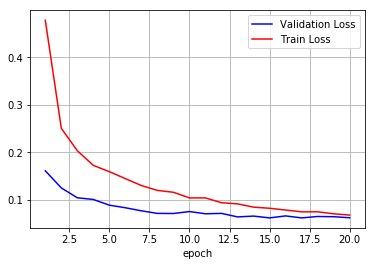

In [205]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax13 = plt.subplots(1,1)
ax13.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy13 = history.history['val_loss']
ty13 = history.history['loss']
plt_dynamic(x, vy13, ty13, ax13)

# MLP + Batch-Norm on hidden Layers + AdamOptimizer 

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [0]:

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history22 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.4990 - acc: 0.8523 - val_loss: 2.5404 - val_acc: 0.4955
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.3040 - acc: 0.9134 - val_loss: 1.1362 - val_acc: 0.6734
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2858 - acc: 0.9184 - val_loss: 3.6013 - val_acc: 0.5283
Epoch 4/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2764 - acc: 0.9224 - val_loss: 3.7374 - val_acc: 0.3750
Epoch 5/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2709 - acc: 0.9233 - val_loss: 4.2437 - val_acc: 0.4488
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2677 - acc: 0.9244 - val_loss: 1.9153 - val_acc: 0.6519
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2655 - acc: 0.9250 - val_loss: 0.

In [0]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_51 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_52 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_53 (Batc (None, 784)               3136      
_________________________________________________________________
dense_121 (Dense)            (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 7.042523400878906
Test accuracy: 0.2545


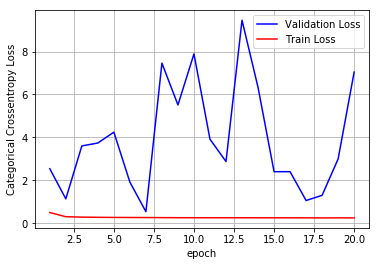

In [0]:

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy22 = history22.history['val_loss']
ty22 = history22.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

#  MLP + Dropout + AdamOptimizer

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(352, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(164, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(124, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [0]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 353us/step - loss: 1.3856 - acc: 0.5609 - val_loss: 0.4648 - val_acc: 0.8824
Epoch 2/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.8712 - acc: 0.7147 - val_loss: 0.4242 - val_acc: 0.8942
Epoch 3/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.8538 - acc: 0.7223 - val_loss: 0.4157 - val_acc: 0.8953
Epoch 4/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.8499 - acc: 0.7215 - val_loss: 0.4113 - val_acc: 0.8966
Epoch 5/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.8475 - acc: 0.7249 - val_loss: 0.4098 - val_acc: 0.8946
Epoch 6/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.8390 - acc: 0.7245 - val_loss: 0.4099 - val_acc: 0.8958
Epoch 7/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.8367 - acc: 0.7270 - val_loss: 0.

In [0]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_62 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_23 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_24 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_25 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 784)               3136      
__________

Test score: 0.40664906318187716
Test accuracy: 0.8981


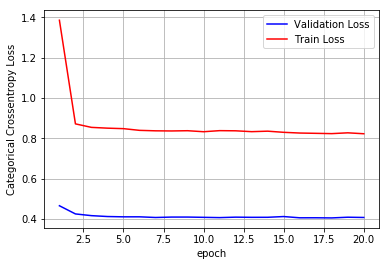

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

 # 5-Hidden layer architecture (784-215-170-135-80-25-10 architecture)¶
 ### Using MLP+Adam+ReLU

In [200]:
model_relu = Sequential()
model_relu.add(Dense(215, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(135, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(25, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(X_train, Y_train, 
                         batch_size=batch_size, 
                         epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 215)               168775    
_________________________________________________________________
dense_145 (Dense)            (None, 170)               36720     
_________________________________________________________________
dense_146 (Dense)            (None, 135)               23085     
_________________________________________________________________
dense_147 (Dense)            (None, 80)                10880     
_________________________________________________________________
dense_148 (Dense)            (None, 25)                2025      
_________________________________________________________________
dense_149 (Dense)            (None, 10)                260       
Total params: 241,745
Trainable params: 241,745
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.10955118349561235
Test accuracy: 0.9727


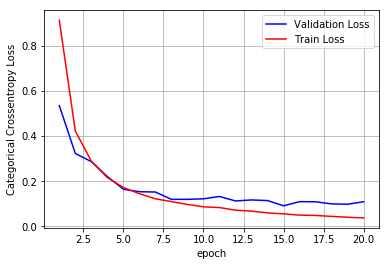

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history11.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)

# MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(215, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(135, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(25, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(X_train, Y_train, 
                           batch_size=batch_size,
                           epochs=nb_epoch, verbose=1, 
                           validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.4930 - acc: 0.8533 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.3068 - acc: 0.9116 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 3/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2869 - acc: 0.9196 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.2781 - acc: 0.9222 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.2743 - acc: 0.9228 - val_loss: 14.5297 - val_acc: 0.0980
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2690 - acc: 0.9239 - val_loss: 14.4579 - val_acc: 0.1030
Epoch 7/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.2662 - acc: 0.9255 - val_lo

In [0]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_57 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_58 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_59 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_60 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_61 (Batc (None, 784)               3136      
_________________________________________________________________
dense_137 (Dense)            (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
_________________________________________________________________


Test score: 14.28869146270752
Test accuracy: 0.1135


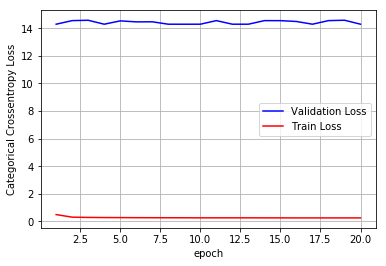

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history32.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

# MLP + Dropout + AdamOptimizer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(215, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(170, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(135, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(80, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(25, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [0]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(X_train, Y_train,
                         batch_size=batch_size,
                         
                         epochs=nb_epoch, verbose=1,
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 463us/step - loss: 2.1623 - acc: 0.3040 - val_loss: 1.0627 - val_acc: 0.8310
Epoch 2/20
60000/60000 [==============================] - 17s 285us/step - loss: 1.6262 - acc: 0.4351 - val_loss: 0.9791 - val_acc: 0.8452
Epoch 3/20
60000/60000 [==============================] - 17s 278us/step - loss: 1.6109 - acc: 0.4418 - val_loss: 0.9601 - val_acc: 0.8422
Epoch 4/20
60000/60000 [==============================] - 17s 277us/step - loss: 1.6119 - acc: 0.4403 - val_loss: 0.9623 - val_acc: 0.8476
Epoch 5/20
60000/60000 [==============================] - 15s 254us/step - loss: 1.5957 - acc: 0.4464 - val_loss: 0.9451 - val_acc: 0.8471
Epoch 6/20
60000/60000 [==============================] - 15s 249us/step - loss: 1.6111 - acc: 0.4390 - val_loss: 0.9597 - val_acc: 0.8468
Epoch 7/20
60000/60000 [==============================] - 15s 251us/step - loss: 1.6066 - acc: 0.4436 - val_loss: 0.

In [0]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_62 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_23 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_24 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_25 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 784)               3136      
__________

Test score: 0.9469478063583374
Test accuracy: 0.8531


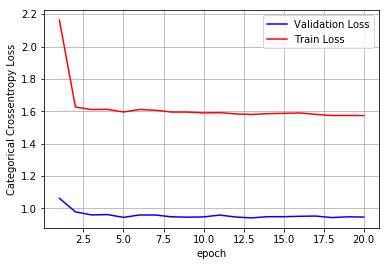

In [201]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history33.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

# Pretty Table

In [0]:

from prettytable import PrettyTable

In [0]:
models=['2-HiddenLayer MLP+ReLu+Adam',
        '2-HiddenLayer MLP+Relu+adam+BN',
        '2-hiddenlayer MLP+reLu+Adam+BN+Drop-out',
        '3-HiddenLayer MLP+ReLu+Adam',
        '3-HiddenLayer MLP+Relu+adam+BN',
        '3-HiddenLayer MLP+reLu+Adam+BN+Drop-out',
        '5-HiddenLayer MLP+ReLu+Adam',
        '5-HiddenLayer MLP+Relu+adam+BN',
        '5-HiddenLayer MLP+reLu+Adam+BN+Drop-out']

In [0]:
training_accuracy=[train_acc1,train_acc2,train_acc3,train_acc4,
                   train_acc5,train_acc6,train_acc7,train_acc8,
                   train_acc9
                   
                  ]


In [0]:
test_score=[score1,score3,score5,score7,score9,score11,score13,score15,
           score17]

In [0]:
test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]

In [209]:

# Initializing prettytable
Performance = PrettyTable()
# Adding columns
Performance.add_column("INDEX.",INDEX)
Performance.add_column("MODEL_NAME",models)
Performance.add_column("TRAINING ACCURACY",training_accuracy)
Performance.add_column("TESTING ACCURACY",test_accuracy)
Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Performance)

+--------+-----------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+---------------------+
| INDEX. |                MODEL_NAME               |                                                                                                                                                                                           TRAINING ACCURACY                                                                                                                                                                                           | TESTING ACCURACY |      TEST SCORE     |
+--------+------------------